# 2. 색상 추출

In [3]:
from PIL import Image, ImageDraw
from sklearn.cluster import KMeans
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

## 2-1. 함수 정의
- bbox 좌표 변환 함수 
- 이미지에서 K-means 클러스터링으로 색상 추출 함수
- 이미지에서 색상 추출 함수 
- csv로 저장하는 함수 

In [ ]:
# 바운딩 박스 좌표를 정규화된 좌표에서 실제 좌표로 변환하는 함수

def convert_normalized_coordinates(bbox, image_width, image_height):
    class_label, x_center, y_center, width, height = bbox

    x = int((x_center - width/2) * image_width)
    y = int((y_center - height/2) * image_height)
    w = int(width * image_width)
    h = int(height * image_height)

    return class_label, x, y, w, h

In [10]:
# 이미지에서 K-Means 클러스터링을 사용하여 주요 색상 추출하는 함수

def kmeans_find_major_color(image):

    pixels = np.array(image).reshape((-1, 3))
    kmeans = KMeans(n_clusters=1, n_init=10, random_state=42)
    kmeans.fit(pixels)

    if kmeans.cluster_centers_ is not None and len(kmeans.cluster_centers_) > 0:
        dominant_color = tuple(map(int, kmeans.cluster_centers_[0]))
        return dominant_color
    else:
        return None

In [9]:
# 이미지에서 주요 색상을 추출하는 함수

def extract_major_colors(image_path, bounding_boxes):

    all_major_colors = []
    image = None  # 이미지 변수 초기화

    try:
        image = Image.open(image_path)

        for bbox in bounding_boxes:
            class_label, x, y, w, h = convert_normalized_coordinates(bbox, image.width, image.height)

            # 바운딩 박스 그리기
            draw = ImageDraw.Draw(image)
            draw.rectangle([x, y, x + w, y + h], outline="green", width=2)

            # 주요 색상 추출 (kmeans_find_major_color 함수 사용)
            major_color = kmeans_find_major_color(image.crop((x, y, x + w, y + h)))

            # 주요 색상과 클래스 레이블 저장
            if major_color is not None:
                all_major_colors.append((class_label, major_color))
                
    except Exception as e:
        print(f"에러 발생: {e} - 이미지 파일: {image_path}")

    return all_major_colors, image  # 이미지 변수 반환

In [11]:
# 주요 색상 데이터를 CSV 파일로 저장하는 함수

def save_to_csv(data, filename):
    
    try:
        with open(filename, 'a', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            for row in data:
                if row[1] is not None:  # 주요 색상이 None이 아닌 경우에만 추가
                    csv_writer.writerow(row)
    except Exception as e:
        print(f"에러 발생: {e} - CSV 파일 저장 중 문제 발생")

## 2-2. 실험 이미지에 대해서 테스트

색상추출 결과 [(0.0, (16, 20, 23)), (1.0, (38, 45, 45))]


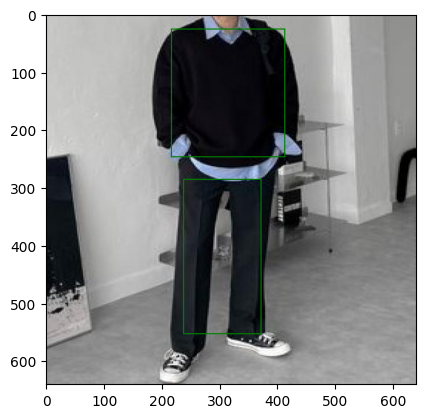

In [13]:
# 이미지와 바운딩 박스 디렉토리 설정
image_dir = "/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/images"
bbox_dir = "/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/labels"

# 실험 파일 설정
image_file = "image_12_jpg.rf.b2d7bec9a0ca316cc58fe8027afe7374.jpg"
bbox_file = "image_12_jpg.rf.b2d7bec9a0ca316cc58fe8027afe7374.txt"

# 이미지와 바운딩 박스 경로 설정
image_path = os.path.join(image_dir, image_file)
bbox_path = os.path.join(bbox_dir, bbox_file)

try:
    # 바운딩 박스 데이터 읽기
    with open(bbox_path, "r") as file:
        bounding_boxes = [list(map(float, line.split())) for line in file]

    # 주요 색상 추출 및 저장
    all_major_colors, image = extract_major_colors(image_path, bounding_boxes)

except Exception as e:
    print(f"에러 발생: {e} - 바운딩 박스 파일: {bbox_path}")

# 결과를 CSV 파일로 저장
save_to_csv(all_major_colors, 'output241102.csv')

# 주요 색상이 그려진 이미지를 화면에 표시
print('색상추출 결과', all_major_colors)
plt.imshow(image)
plt.show()

색상추출 결과 [(0.0, (37, 41, 47)), (1.0, (36, 43, 49))]


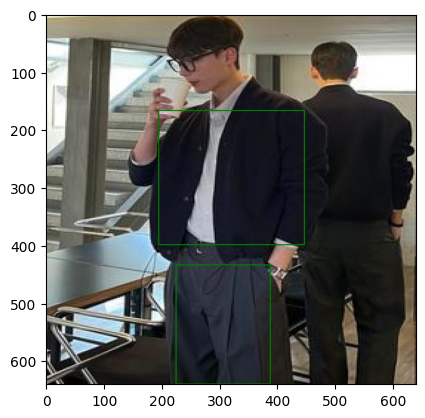

In [14]:
# 이미지와 바운딩 박스 디렉토리 설정
image_dir = "/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/images"
bbox_dir = "/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/labels"

# 실험 파일 설정
image_file = "image_32_jpg.rf.bcc83aad550e8910f04068077af50013.jpg"
bbox_file = "image_32_jpg.rf.bcc83aad550e8910f04068077af50013.txt"

# 이미지와 바운딩 박스 경로 설정
image_path = os.path.join(image_dir, image_file)
bbox_path = os.path.join(bbox_dir, bbox_file)

try:
    # 바운딩 박스 데이터 읽기
    with open(bbox_path, "r") as file:
        bounding_boxes = [list(map(float, line.split())) for line in file]

    # 주요 색상 추출 및 저장
    all_major_colors, image = extract_major_colors(image_path, bounding_boxes)

except Exception as e:
    print(f"에러 발생: {e} - 바운딩 박스 파일: {bbox_path}")

# 결과를 CSV 파일로 저장
save_to_csv(all_major_colors, 'output241102.csv')

# 주요 색상이 그려진 이미지를 화면에 표시
print('색상추출 결과', all_major_colors)
plt.imshow(image)
plt.show()

# 2-3. 모든 이미지에 대해서 색상 검출하여 최종 csv 구축

In [15]:
def process_images(image_dir, bbox_dir, output_csv):
    all_major_colors = []  # 모든 이미지에 대한 주요 색상을 저장할 리스트 초기화

    try:
        # 이미지 디렉토리에 있는 모든 파일에 대해 반복
        for file_name in os.listdir(image_dir):
            # 이미지 파일 경로
            image_path = os.path.join(image_dir, file_name)

            # 해당 이미지 파일에 대응하는 바운딩 박스 파일 경로
            bbox_file_name = os.path.splitext(file_name)[0] + ".txt"
            bbox_path = os.path.join(bbox_dir, bbox_file_name)

            try:
                # 바운딩 박스 데이터 읽기
                with open(bbox_path, "r") as file:
                    bounding_boxes = [list(map(float, line.split())) for line in file]

                # 주요 색상 추출 및 저장
                current_major_colors, _ = extract_major_colors(image_path, bounding_boxes)

                # 현재 이미지의 주요 색상을 전체 리스트에 추가
                all_major_colors.extend(current_major_colors)

            except Exception as e:
                print(f"에러 발생: {e} - 바운딩 박스 파일: {bbox_path}")

    except Exception as e:
        print(f"에러 발생: {e} - 이미지 디렉토리: {image_dir}")

    # 결과를 CSV 파일로 저장
    save_to_csv(all_major_colors, output_csv)

# 색상검출
process_images("/data1/project/seoeun/BAF/색상추출/Crawling2_3/train/images", "/data1/project/seoeun/BAF/색상추출/Crawling2_3/train/labels", 'train색상검출완료.csv')
process_images("/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/images", "/data1/project/seoeun/BAF/색상추출/Crawling2_3/test/labels", 'test색상검출완료.csv')
process_images("/data1/project/seoeun/BAF/색상추출/Crawling2_3/valid/images", "/data1/project/seoeun/BAF/색상추출/Crawling2_3/valid/labels", 'valid색상검출완료.csv')